In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Data Preprocessing

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/gdrive/MyDrive/ml/dataset_comb.csv")
data=data.to_numpy()
print(data[0:2,-1])
classes=(np.unique(data[:,-1]))
print(classes)

['jasmine' 'jasmine']
['Gonen' 'jasmine']


In [ ]:
for i in range(0,len(data)):
  for j in range(0,len(classes)):
    if(data[i,-1]==classes[j]):
      data[i,-1]=j

In [ ]:
from sklearn.model_selection import KFold
X=data[:,:-1]
Y=data[:,-1]
Y=Y.astype('int')
kf = KFold(7)

Fisher

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_acc=[]
tf=[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model=LinearDiscriminantAnalysis().fit(X_train,y_train)
  train_acc.append(model.score(X_train,y_train))
  tf.append(model.score(X_test,y_test))
print(train_acc)
print(tf)
print(np.mean(train_acc))
print(np.mean(tf))
print(np.std(tf))

[1.0, 0.9999358439725412, 0.9999358439725412, 0.9999358439725412, 0.9999358439725412, 0.9998716879450824, 0.999871696176546]
[0.9919168591224018, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
0.9999266800016847
0.9988452655889145
0.002828510095592603


Linear Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
train_acc=[]
tp=[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model=Perceptron().fit(X_train,y_train)
  train_acc.append(model.score(X_train,y_train))
  tp.append(model.score(X_test,y_test))
print(train_acc)
print(tp)
print(np.mean(train_acc))
print(np.mean(tp))
print(np.std(tp))

[0.9893500994418426, 0.9982036312311542, 0.9908898441008532, 0.9881952909475845, 0.9952524539680503, 0.9916597164303587, 0.9826789838337182]
[0.9992301770592764, 0.9661277906081601, 0.9626635873749038, 0.9961508852963818, 1.0, 1.0, 0.9996149403157489]
0.9908900028505089
0.9891124829506388
0.015707708146990733


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
train_acc=[]
tn=[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model=GaussianNB().fit(X_train,y_train)
  train_acc.append(model.score(X_train,y_train))
  tn.append(model.score(X_test,y_test))
print(train_acc)
print(tn)
print(np.mean(train_acc))
print(np.mean(tn))
print(np.std(tn))

[0.9931994610893693, 0.9748508372361583, 0.9734394046320651, 0.9810098158722012, 0.9844742413549753, 0.9835760569705524, 0.9870413138311521]
[0.993841416474211, 0.9753656658968437, 0.9826789838337182, 0.9842186297151655, 0.9811393379522709, 0.9826789838337182, 0.9249133615710435]
0.9825130187123533
0.974976625610996
0.021059129003274533


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
train_acc=[]
tl=[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model=LogisticRegression(max_iter=150).fit(X_train,y_train)
  train_acc.append(model.score(X_train,y_train))
  tl.append(model.score(X_test,y_test))
print(train_acc)
print(tl)
print(np.mean(train_acc))
print(np.mean(tl))
print(np.std(tl))

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9996150885296382, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0
0.9999450126470911
0.00013469095693297183


ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
train_acc=[]
ta=[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model=MLPClassifier(max_iter=300).fit(X_train,y_train)
  train_acc.append(model.score(X_train,y_train))
  ta.append(model.score(X_test,y_test))
print(train_acc)
print(ta)
print(np.mean(train_acc))
print(np.mean(ta))
print(np.std(ta))

[1.0, 1.0, 0.9998075319176236, 0.9992942836979535, 0.9997433758901649, 0.9988451915057419, 0.9976263792661021]
[0.9996150885296382, 0.8852963818321786, 0.9896073903002309, 0.9988452655889145, 0.9946112394149346, 1.0, 0.961108971890643]
0.9993309660396552
0.9755834767937914
0.03897763552026057


SVM

In [ ]:
from sklearn import svm
train_acc=[]
ts=[]
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model=svm.SVC().fit(X_train,y_train)
  train_acc.append(model.score(X_train,y_train))
  ts.append(model.score(X_test,y_test))
print(train_acc)
print(ts)
print(np.mean(train_acc))
print(np.mean(ts))
print(np.std(ts))

[0.9700391351767499, 0.9783152627189324, 0.9781227946365562, 0.9789568229935203, 0.9736318727144415, 0.9695258869570796, 0.9702335129586862]
[0.9969207082371054, 0.9530408006158584, 0.9422632794457275, 0.9430331023864511, 0.9607390300230947, 1.0, 1.0]
0.9741178983079951
0.9708567029583196
0.025041411972243792


Plots

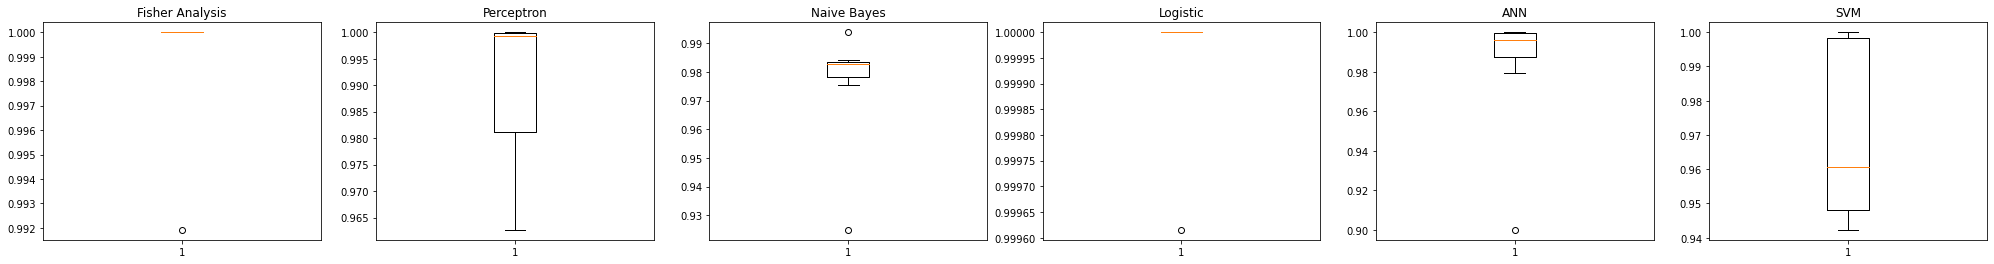

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,6,1)
plt.boxplot(tf)
plt.title("Fisher Analysis")

plt.subplot(1,6,2)
plt.boxplot(tp)
plt.title("Perceptron")

plt.subplot(1,6,3)
plt.boxplot(tn)
plt.title("Naive Bayes")

plt.subplot(1,6,4)
plt.boxplot(tl)
plt.title("Logistic")

plt.subplot(1,6,5)
plt.boxplot(ta)
plt.title("ANN")

plt.subplot(1,6,6)
plt.boxplot(ts)
plt.title("SVM")

plt.subplots_adjust(left=0.5, bottom=None, right=5, top=None, wspace=None, hspace=None)

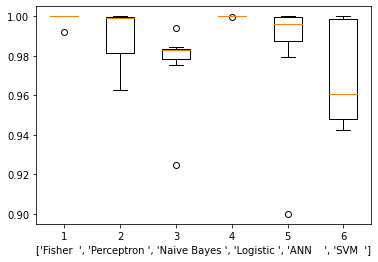

In [ ]:
res_data=[tf,tp,tn,tl,ta,ts]
plt.boxplot(res_data)
labels=["Fisher  ","Perceptron ","Naive Bayes ","Logistic ","ANN    ","SVM  "]
plt.xlabel(labels)
plt.show()